In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import os
from tqdm import tqdm

import statsmodels.api as sm

/Users/feixu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Assume that a cleaned dataset is downloaded in the `dataset` directory
data_file = './dataset/arxiv-cleaned-metadata.csv'

# Load the full dataset
docs = pd.read_csv(data_file, parse_dates=True)
docs.date = pd.to_datetime(docs.date)

# Load a sample of the documents
# docs = docs.sample(n=10000)

In [20]:
from typing import Union
def bar_ploter(data:pd.Series,
               normalization:Union[pd.Series, None] = None,
               title='',
               figsize=(6,3)):
    
    # Convert the timestamp index to strings representing the year only
    if pd.api.types.is_datetime64_any_dtype(data.index):
        data.index = data.index.strftime('%Y')

    fig, ax = plt.subplots(figsize=figsize)
    
    if normalization is not None:
        ax.bar(x=data.index, height=data.values/normalization.values, width=0.6, zorder=2)
    else:
        ax.bar(x=data.index, height=data.values, width=0.6, zorder=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', 
            linestyle='--',
            zorder=1)

    ax.set_xlabel('Year', fontsize=14)
    ax.set_title(title, fontsize=14)

    # Rotate the x-axis tick labels by 60 degrees
    plt.xticks(rotation=60)

    # Show the plot
    plt.tight_layout()
    plt.show()

def line_ploter(data:pd.Series,
               normalization:Union[pd.Series, None] = None,
               title='',
               figsize=(6,3)):
    sns.lineplot(data=data, x='year', y='price')

In [21]:
docs.head()

,date,categories,title,abstract
0,1990-01-01,cs.CC,Nested satisfiability,A special case of the satisfiability problem...
1,1990-01-01,math.CO math.PR,Stable husbands,Suppose $n$ boys and $n$ girls rank each oth...
2,1990-01-15,math.LO,Categoricity over P for first order T or categ...,Suppose L is a relational language and P in ...
3,1990-01-15,math.LO,Full reflection of stationary sets below aleph...,"It is consistent that for every n >= 2, ever..."
4,1990-01-15,math.LO,The primal framework. I,This the first of a series of articles deali...


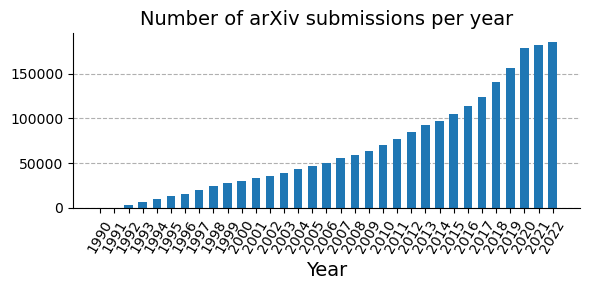

In [22]:
yearly_submission = docs.groupby(pd.Grouper(key='date', freq="Y")).size()

bar_ploter(yearly_submission, 
           title='Number of arXiv submissions per year')

In [23]:
technology_terms = [
    'artificial intelligence',
    'machine learning',
    'internet of things',
    'blockchain',
    'augmented reality',
    'virtual reality',
    '5g technology',
    'quantum computing',
    'robotics',
    'cybersecurity',
    'biotechnology',
    'nanotechnology',
    'edge computing',
    'cloud computing',
    'big data',
    'autonomous vehicles',
    'renewable energy',
    'drones',
    'electric vehicles',
    'covid-19',
    'physics',
    'transformer',
]

In [24]:
docs['year'] = docs['date'].dt.year

counts = {}

# Iterate over the technology terms and count the occurrences for each year
for term in technology_terms:
    tqdm.pandas(desc=f"Processing {term}")
    counts[term] = docs.groupby('year')['abstract'].progress_apply(lambda x: x.str.contains(term, case=False).sum())

freq = pd.DataFrame(counts)
freq

Processing transformer: 100%|███████████████████| 33/33 [00:18<00:00,  1.78it/s]


,artificial intelligence,machine learning,internet of things,blockchain,augmented reality,virtual reality,5g technology,quantum computing,robotics,cybersecurity,...,edge computing,cloud computing,big data,autonomous vehicles,renewable energy,drones,electric vehicles,covid-19,physics,transformer
year,,,,,,,,,,,,,,,,,,,,,
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,135,0
1993,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,292,0
1994,2,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,441,2
1995,2,7,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,583,0
1996,1,11,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,634,1
1997,2,7,0,0,0,0,0,7,1,0,...,0,0,0,0,0,0,0,0,815,0
1998,3,9,0,0,0,0,0,15,0,0,...,0,0,0,0,0,0,0,0,904,0


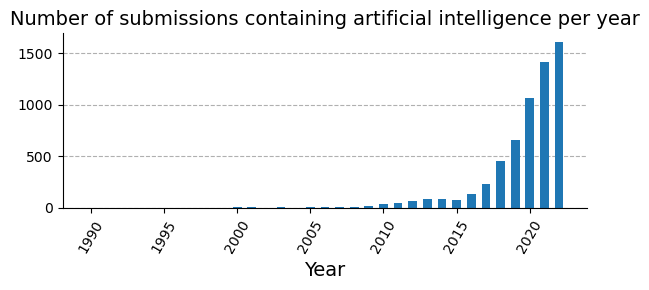

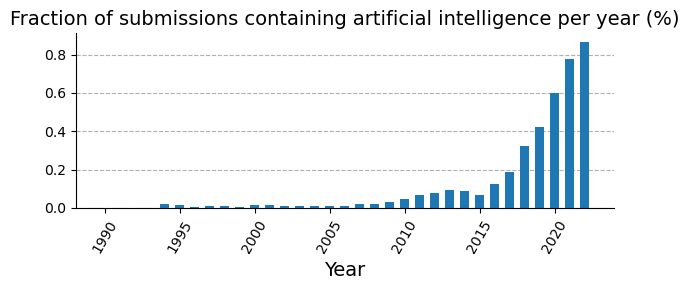

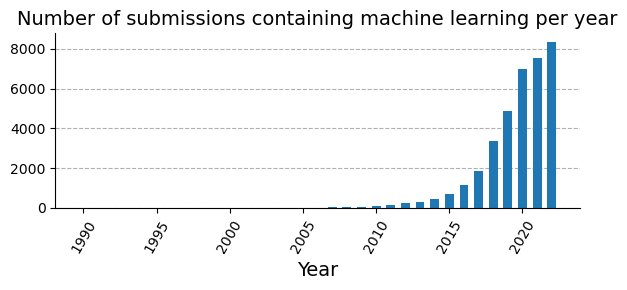

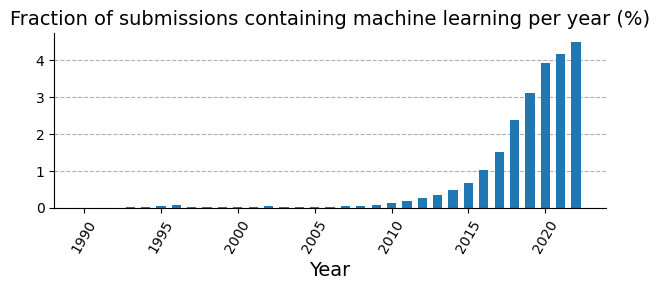

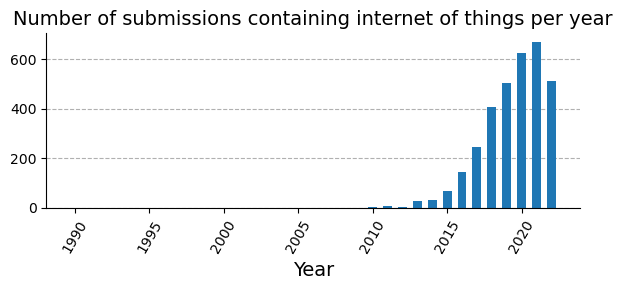

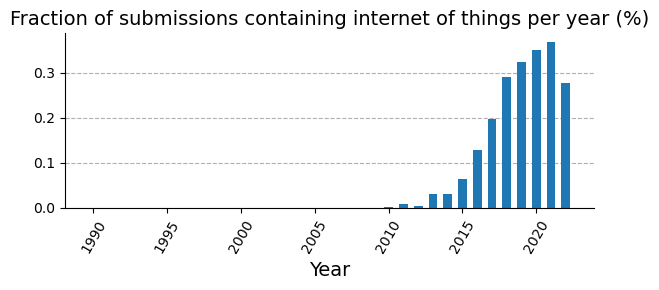

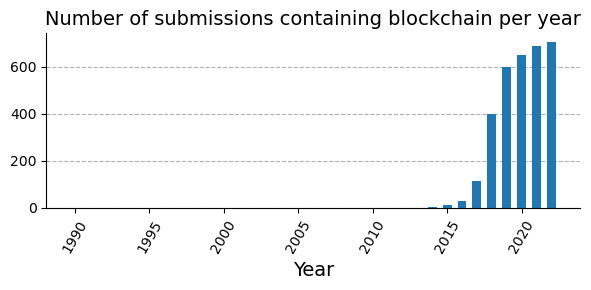

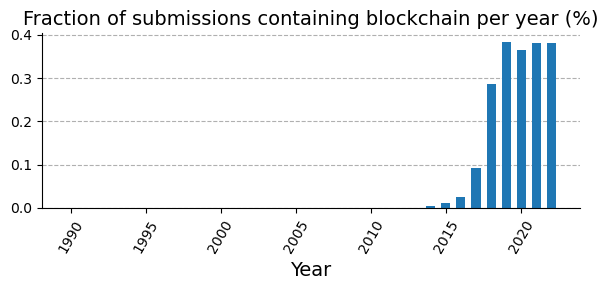

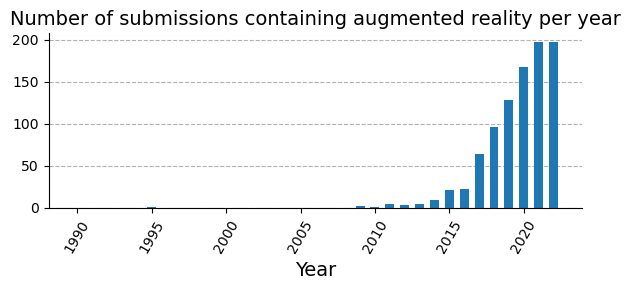

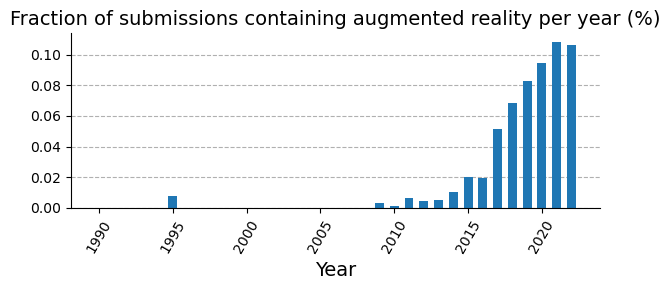

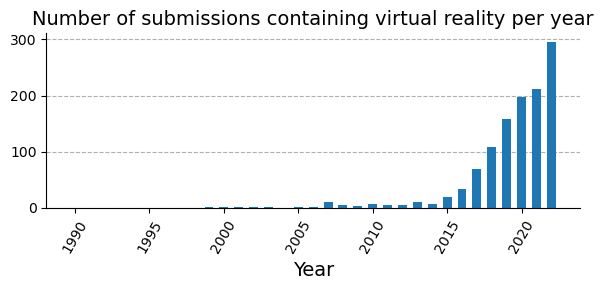

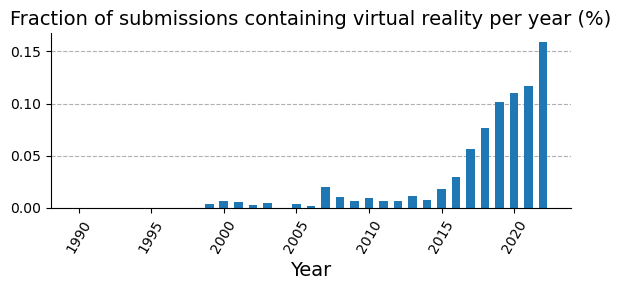

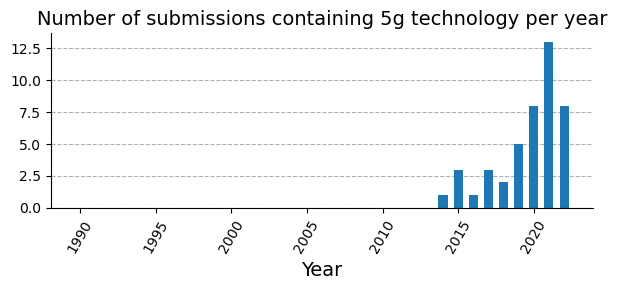

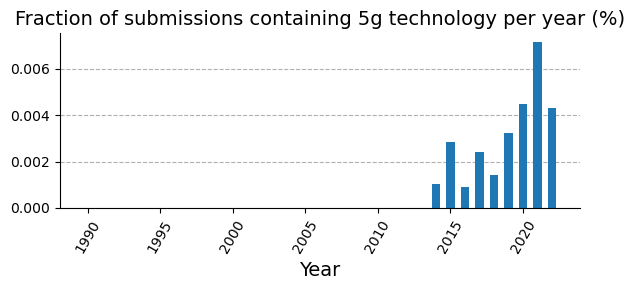

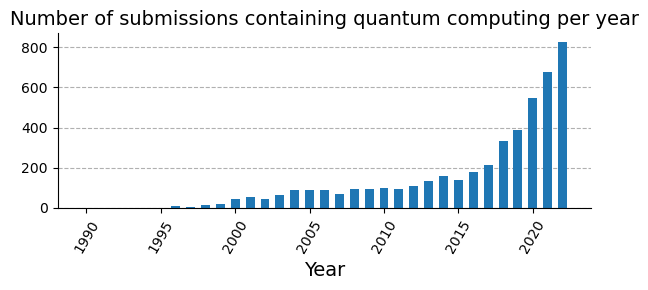

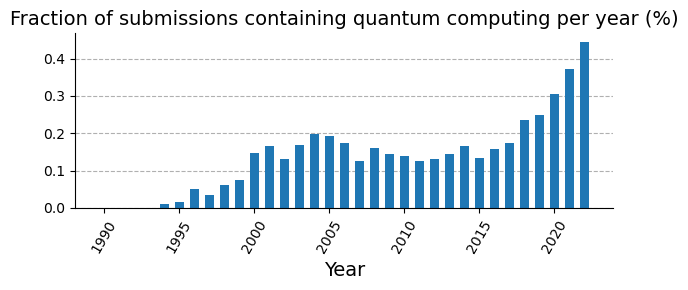

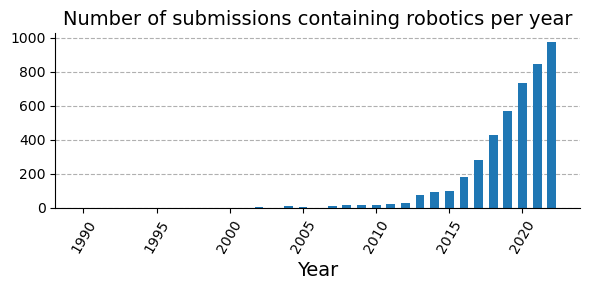

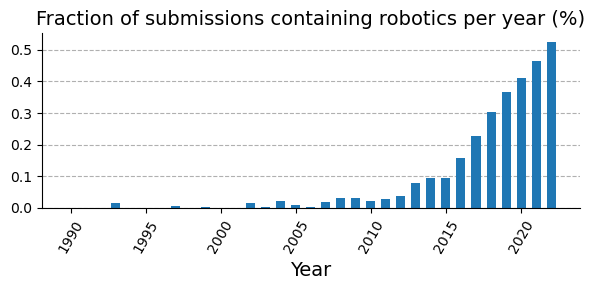

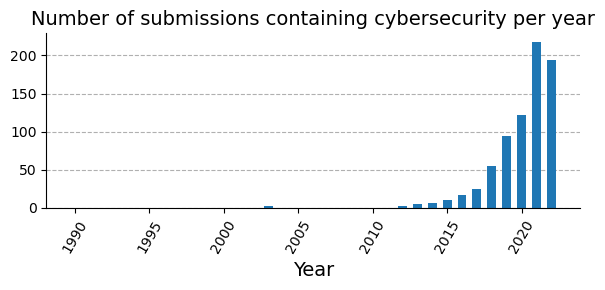

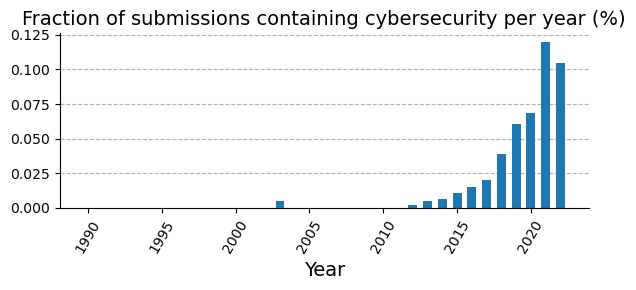

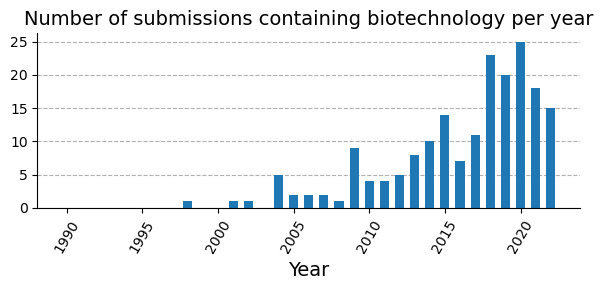

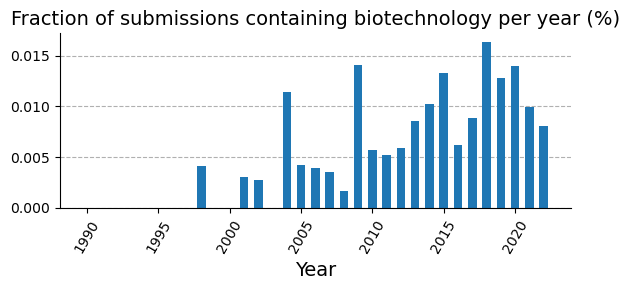

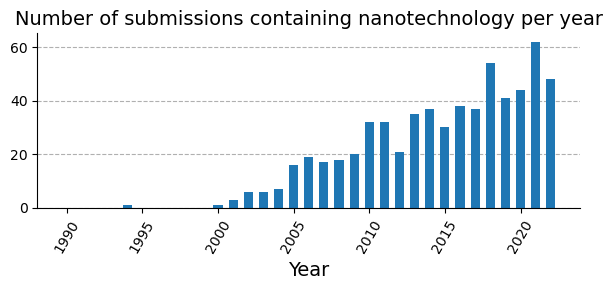

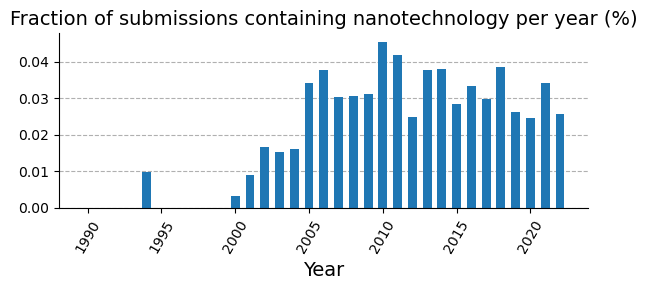

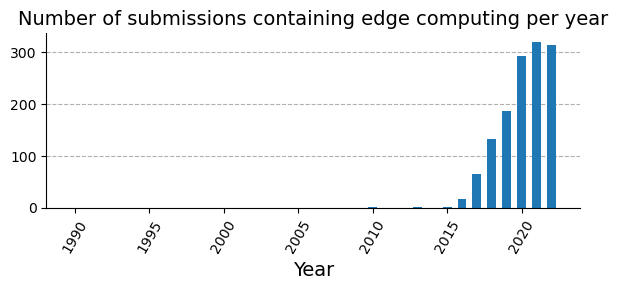

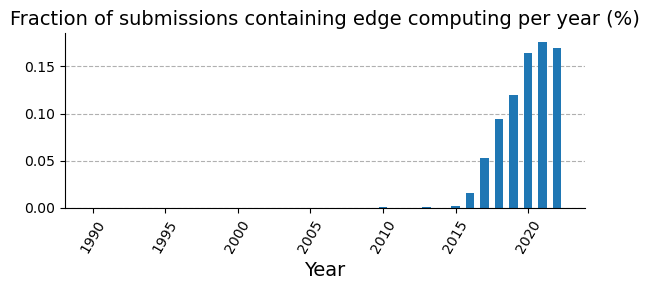

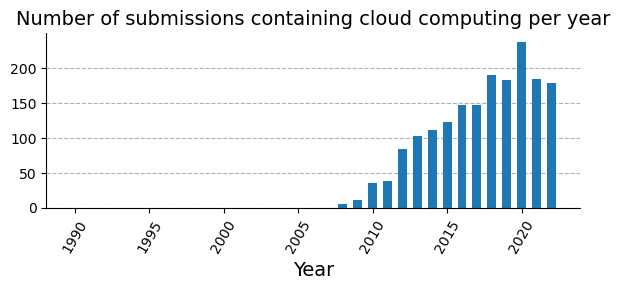

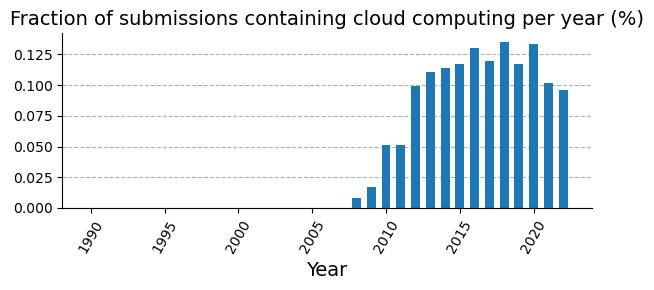

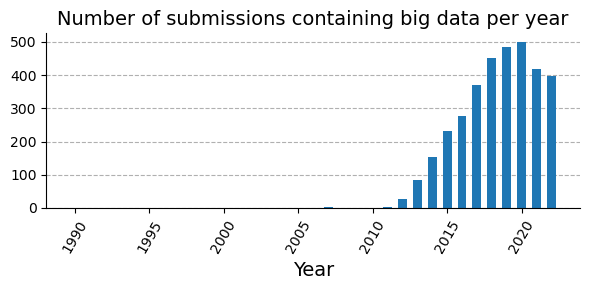

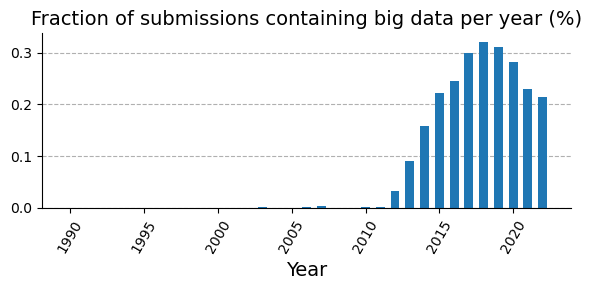

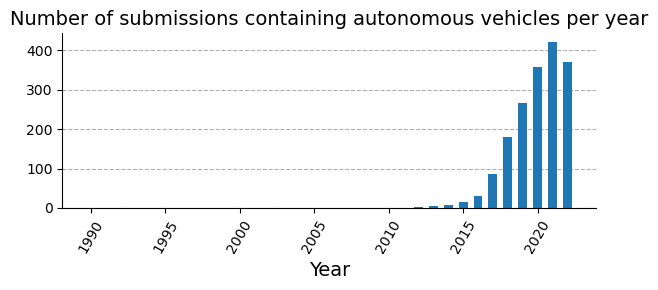

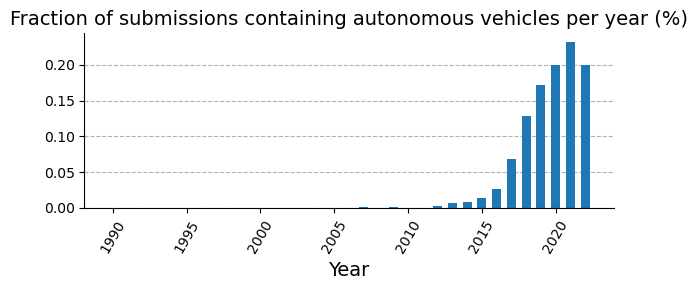

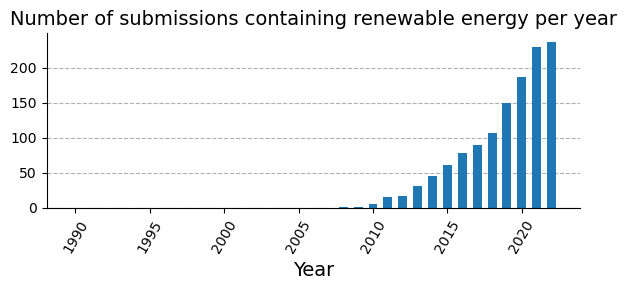

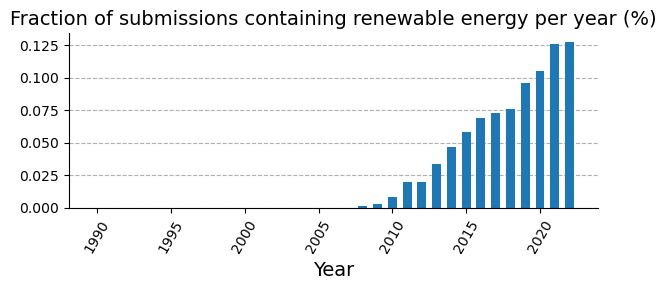

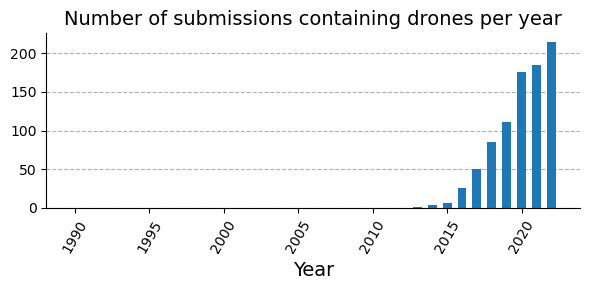

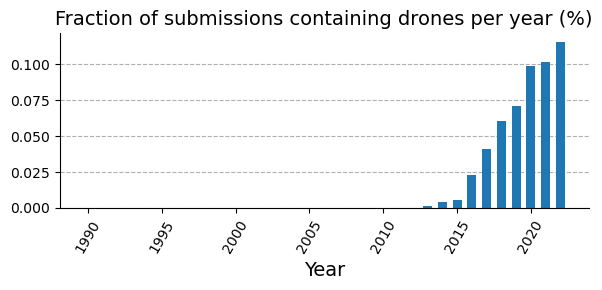

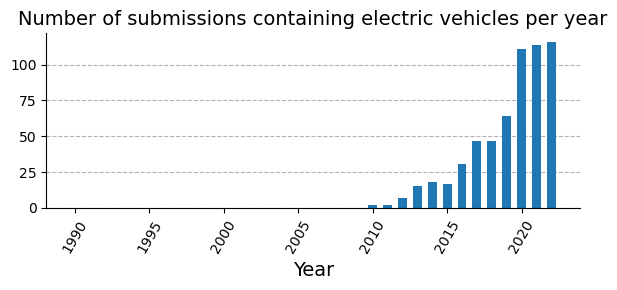

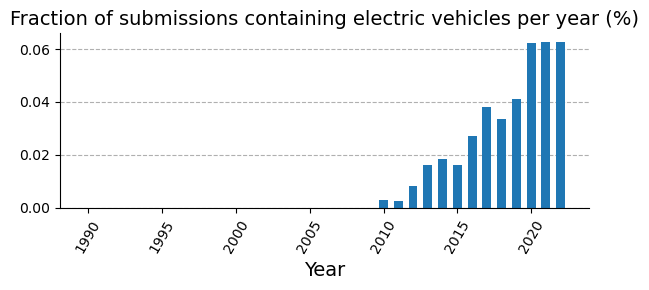

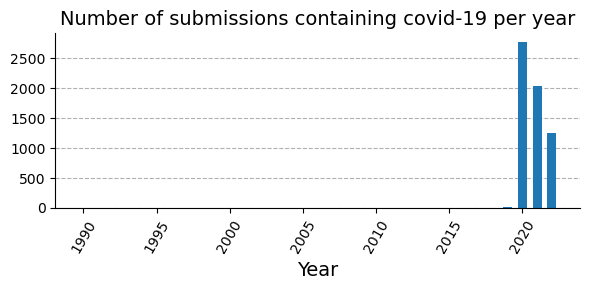

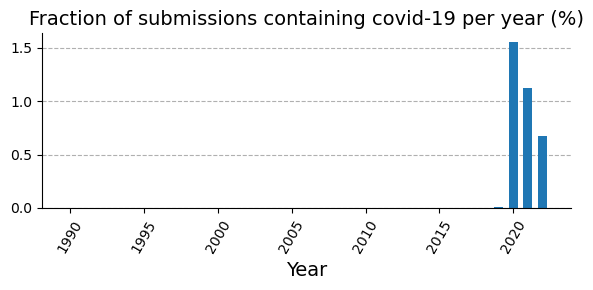

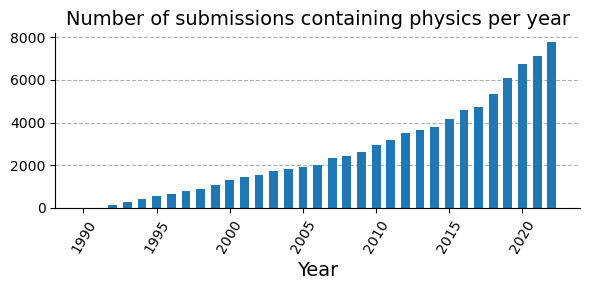

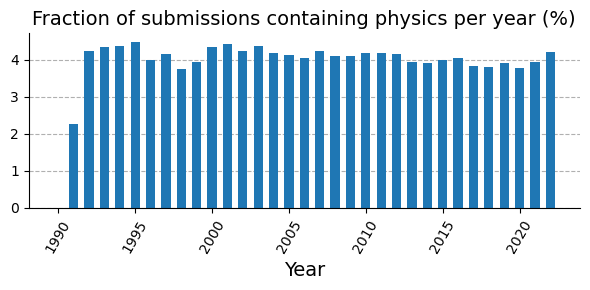

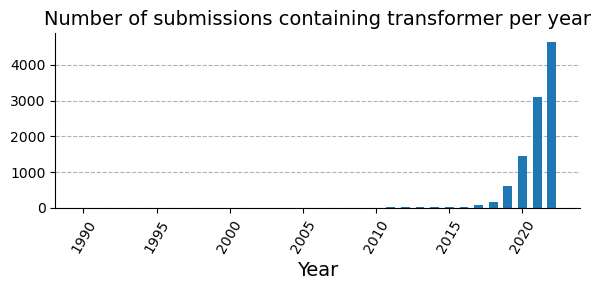

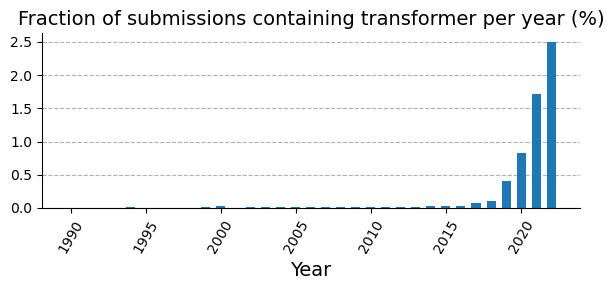

In [25]:
# Plotting the data
for term in technology_terms:
    bar_ploter(freq[term],
               title=f'Number of submissions containing {term} per year')
    bar_ploter(freq[term]*100,
               normalization=yearly_submission,
               title=f'Fraction of submissions containing {term} per year (%)')